In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


pd.set_option("display.max_columns", 100)

LSTM 

In [2]:
DATA_PATH = Path.cwd().parent / "data" / "final" / "public"

In [3]:
#Import the test and get stock information
df = pd.read_excel(
     r'C:\Users\ratho\Desktop\MMA subs\823\XMMA823_AssignmentData_topost.xlsx')


In [4]:
df

,Date,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,TWTR,VZ,WYNN,KHC,JNJ,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
0,1,33.482319,34.465744,50.064999,976.619995,137.422821,30.548828,76.522003,26.870838,53.836395,18.150000,36.304821,128.156845,70.984398,119.282982,16.140646,63.823997,199.325455,208.325409,2434.50,21397.29,10.48,111.36,1.2659,1.1148
1,2,34.008343,34.619576,50.187000,986.090027,137.280762,30.557764,76.690002,26.957619,54.107803,18.500000,36.280846,129.344452,70.785240,119.616119,16.183868,64.019783,202.829193,207.332001,2438.30,21394.76,10.02,111.26,1.2727,1.1196
2,3,33.785179,34.510723,49.699001,972.090027,136.677109,30.843687,75.498001,26.855061,53.954002,18.290001,36.568604,128.250381,70.856941,119.537193,16.382711,63.853378,202.838623,209.080063,2439.07,21409.55,9.90,111.48,1.2732,1.1196
3,4,31.489799,34.016071,48.839001,948.090027,136.464066,30.566696,72.473999,26.642052,53.338821,18.120001,35.841225,126.829002,69.717690,118.371109,16.261677,62.110935,201.868484,203.597061,2419.38,21310.66,11.06,112.42,1.2791,1.1300
4,5,32.023800,34.513088,49.516499,961.010010,136.978943,30.897297,74.248001,26.626272,53.537861,17.950001,35.841225,127.118912,69.964661,117.327789,16.252941,62.022831,204.524536,204.036484,2440.69,21454.61,10.03,112.18,1.2936,1.1364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,1137,112.766838,179.836319,169.669495,2958.129883,265.285767,57.430000,1093.939941,58.278038,112.848961,44.330002,51.426659,87.580002,34.707169,167.511383,17.453543,155.113174,255.381592,554.017944,4791.19,36302.38,17.68,114.85,1.3438,1.1329
1137,1138,112.995125,178.799164,170.660995,2933.739990,264.929749,57.110001,1088.469971,57.106567,114.182762,43.430000,51.465706,86.459999,35.128395,168.182755,17.453543,154.843491,255.570953,554.574707,4786.35,36398.21,17.54,114.75,1.3432,1.1314
1138,1139,114.146523,178.888916,169.201004,2933.100098,265.533020,57.230000,1086.189941,56.683266,114.983032,42.759998,51.114269,84.980003,35.079414,169.367462,17.453543,155.193085,256.617401,559.178162,4793.06,36488.63,16.95,114.97,1.3475,1.1337
1139,1140,112.935577,177.712143,168.644501,2924.010010,264.267120,58.130001,1070.339966,57.490494,114.844719,44.459999,51.006889,86.150002,34.932472,170.117798,17.523436,154.803528,257.683777,554.216675,4778.73,36398.08,17.33,115.17,1.3500,1.1318


In [5]:
df.shape
df.dtypes

Date         int64
MMAX       float64
AAPL       float64
AMZN       float64
GOOGL      float64
MCD        float64
GM         float64
TSLA       float64
PFE        float64
SBUX       float64
TWTR       float64
VZ         float64
WYNN       float64
KHC        float64
JNJ        float64
HST        float64
HLT        float64
FDX        float64
DPZ        float64
SP500      float64
DJIA       float64
VIXCLS     float64
DEXJPUS    float64
DEXUSUK    float64
DEXUSEU    float64
dtype: object

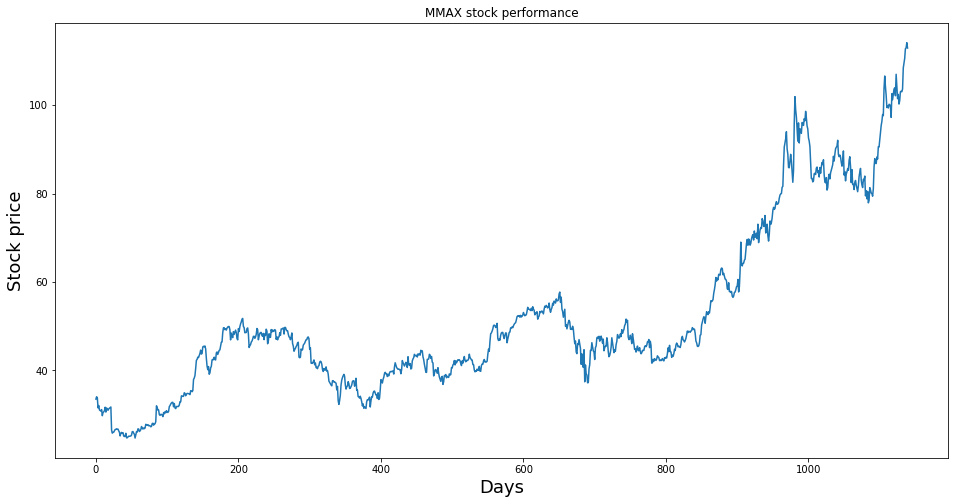

In [6]:
#Visualize the closing price 
plt.figure(figsize=(16,8))
plt.title('MMAX stock performance')
plt.plot(df['MMAX'])
plt.xlabel('Days', fontsize=18)
plt.ylabel('Stock price', fontsize=18)
plt.show()

In [7]:
#Create new dataframe for MMAX
df.drop(df.tail(1).index,inplace=True)
data = df.filter(['MMAX'])


#Convert the df to np array 
dataset = data.values


#Define test train dataset
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

912

In [8]:
#Scale the data as data preprocessing step
scaler = MinMaxScaler(feature_range= (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.09851359],
       [0.10439233],
       [0.1018983 ],
       ...,
       [0.98713222],
       [1.        ],
       [0.98646673]])

In [9]:
#create training dataset
#create the scaled training data 

train_data = scaled_data[0:training_data_len, :]

#Split the data into X_train & y_train 
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.09851359, 0.10439233, 0.1018983 , 0.07624561, 0.08221349,
       0.07090129, 0.0694762 , 0.06805105, 0.07188105, 0.05647164,
       0.06457712, 0.06626958, 0.06920896, 0.07793805, 0.06564601,
       0.07615651, 0.07232651, 0.07018867, 0.07384075, 0.07544404,
       0.07686919, 0.0784724 , 0.02004115, 0.01238099, 0.0143406 ,
       0.01478591, 0.01790346, 0.02155538, 0.02200072, 0.02333682,
       0.02208987, 0.0225352 , 0.01817068, 0.01469688, 0.0053443 ,
       0.01193565, 0.01425148, 0.01184655, 0.01362798, 0.00498802,
       0.00374102, 0.00454264, 0.01193565, 0.0005344 , 0.0006235 ,
       0.00267217, 0.00480986, 0.00445362, 0.00489894, 0.0051662 ,
       0.00757109, 0.01603295, 0.01638921, 0.01238099, 0.00926346,
       0.        , 0.00837276, 0.01630017, 0.01514223, 0.0231587 ])]
[0.022891544050055]



In [10]:
from re import X
#Convert x_train & y_train to np array
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data 
x_train.shape
x_train = np.reshape(x_train, (852, 60, 1))



In [12]:
#Build LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60,1) ))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:

model.compile(optimizer='adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

852/852 [==============================] - 18s 17ms/step - loss: 8.3470e-04


In [14]:
#Create the test data set
#Create a new arrary values from 852 to 1140

test_data = scaled_data[training_data_len-60: , :]


#Create the data sets x_test & y_test
x_test = []
y_test = dataset[training_data_len:, : ]


for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [15]:
#Convert the data to np array 
x_test = np.array(x_test)

In [16]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [17]:
#Predictiions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 12ms/step


In [18]:
#RMSE 
rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

0.953597520527191

C:\Users\ratho\AppData\Local\Temp\ipykernel_17876\1663503083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


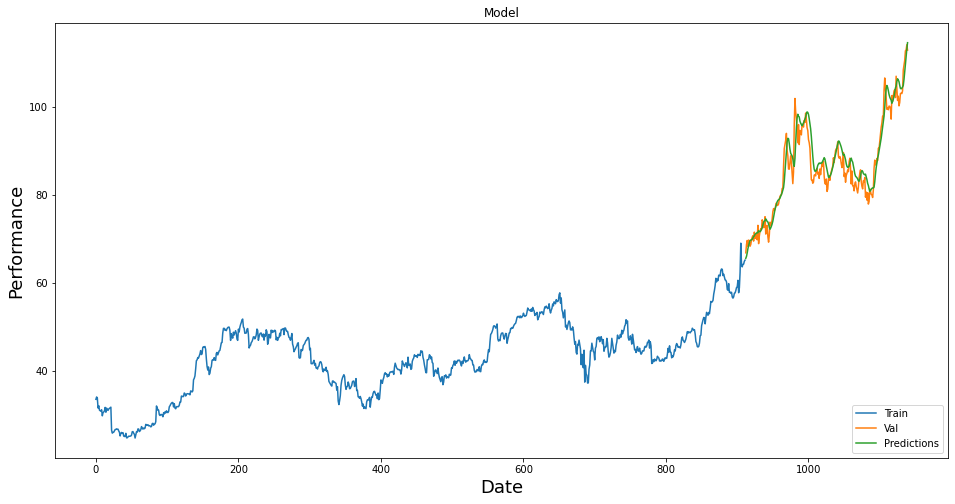

In [19]:
#plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Performance', fontsize=18)
plt.plot(train['MMAX'])
plt.plot(valid[['MMAX', 'Predictions' ]])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,MMAX,Predictions
912,66.812370,65.565163
913,68.707825,66.002716
914,69.621864,66.797668
915,68.303711,67.772232
916,69.718086,68.426025
...,...,...
1135,110.593086,107.917450
1136,112.766838,109.668739
1137,112.995125,111.570923
1138,114.146523,113.195915


In [21]:

new_df = df.filter(['MMAX'])
new_df 


last_60_days = new_df[-60:].values

#Scaled 0-1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


#get predicted scaled price

pred_price = model.predict(X_test)

#undo scaling

pred_price = scaler.inverse_transform(pred_price)
print("Predicted value at index 1140 is ", pred_price )

1/1 [==============================] - 0s 21ms/step
Predicted value at index 1140 is  [[115.413055]]


print("Predicted value at index 1140 is ", pred_price )


In [22]:
print("Predicted value at index 1140 is ", pred_price )

Predicted value at index 1140 is  [[115.413055]]
